In [40]:
%reset

In [41]:
 import pandas as pd

In [42]:
all_nba = pd.read_csv("all_nba.csv")
all_defense = pd.read_csv("all_defense.csv")

In [43]:
#this code block is just getting the data from the all_nba.csv file that is relevant to the player (ommitting that which may also be in players.csv)

all_nba = all_nba[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
all_defense = all_defense[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
all_nba["Player"] = all_nba["Player"].str.replace("*","", regex= False)
all_defense["Player"] = all_defense["Player"].str.replace("*","", regex= False)

In [44]:
players = pd.read_csv("players.csv")
del players["Unnamed: 0"] # gets rid of this uneeded column
del players["Rk"] # gets rid of column 
players["Player"] = players["Player"].str.replace("*","", regex= False) # gets rid of the '*' mark next to some names


In [2]:
# prepping the2024 data (to predict)
import pandas as pd
players_2024 = pd.read_csv("players_2024.csv")
del players_2024["Unnamed: 0"]
del players_2024["Rk"]
players_2024["Player"] = players_2024["Player"].str.replace("*","", regex= False) # gets rid of the '*' mark next to some names

players_2024

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,.501,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,2024
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,.459,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,2024
2,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,.525,...,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,2024
3,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,.521,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,2024
4,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,.411,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,.524,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,2024
758,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,.430,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,2024
759,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,.538,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,2024
760,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,.419,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,2024


In [45]:
players.groupby(["Player", "Year"]).get_group(("Ray Allen", 2003))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
4,Ray Allen,SG,27,TOT,76,75,37.9,7.9,17.9,.439,2.6,7.0,.377,5.2,10.9,.478,.512,4.2,4.5,.916,1.2,3.8,5.0,4.4,1.4,0.2,2.6,2.9,22.5,2003
5,Ray Allen,SG,27,MIL,47,46,35.8,7.5,17.1,.437,2.6,6.6,.395,4.9,10.5,.463,.514,3.8,4.1,.913,1.0,3.7,4.6,3.5,1.2,0.2,2.5,3.2,21.3,2003
6,Ray Allen,SG,27,SEA,29,29,41.3,8.5,19.3,.441,2.7,7.7,.351,5.8,11.7,.500,.511,4.8,5.2,.920,1.7,3.9,5.6,5.9,1.6,0.1,2.8,2.4,24.5,2003


In [46]:
## this function is used because there are multiple rows with the same person in the same year. This functions gets their total stats for the season and assigns them to the last team they played for
def single_row(df):
    if df.shape[0] ==1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"] # changes team to last on in list
        return row
players = players.groupby(["Player", "Year"]).apply(single_row)
players.index = players.index.droplevel() # player and year are both indexes, we will back them all individual rows
players.index = players.index.droplevel()
players

/var/folders/7y/x2g2fgds6c9d9xrjrvscg14r0000gn/T/ipykernel_27934/4073098641.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players = players.groupby(["Player", "Year"]).apply(single_row)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
12894,A.J. Green,SG,23,MIL,35,1,9.9,1.5,3.6,.424,1.3,3.0,.419,0.3,0.6,.450,.600,0.1,0.1,1.000,0.2,1.1,1.3,0.6,0.2,0.0,0.3,0.9,4.4,2023
172,A.J. Guyton,PG,24,GSW,2,0,4.5,0.0,2.0,.000,0.0,0.5,.000,0.0,1.5,.000,.000,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.5,0.0,0.5,0.0,0.0,2003
8593,A.J. Hammons,C,24,DAL,22,0,7.4,0.8,1.9,.405,0.2,0.5,.500,0.5,1.5,.375,.464,0.4,0.9,.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2,2017
13038,A.J. Lawson,SG,22,DAL,15,0,7.2,1.5,2.9,.500,0.7,1.7,.400,0.8,1.3,.632,.614,0.1,0.5,.250,0.4,1.0,1.4,0.1,0.1,0.0,0.2,0.7,3.7,2023
4506,A.J. Price,PG,23,IND,56,2,15.4,2.6,6.3,.410,1.1,3.1,.345,1.5,3.2,.472,.494,1.1,1.3,.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,Žarko Čabarkapa,PF,24,GSW,61,0,8.3,1.1,2.9,.385,0.1,0.3,.250,1.0,2.5,.403,.399,1.0,1.4,.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006
374,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,0.0,0.0,NaN,2.7,4.8,.552,.552,1.3,1.6,.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
955,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,0.0,0.0,NaN,1.4,3.2,.442,.442,1.0,1.3,.767,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
1555,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,0.0,0.0,NaN,2.3,4.0,.568,.568,1.3,1.5,.859,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [6]:

players_2024 = players_2024.groupby(["Player"]).apply(single_row)
players_2024.index = players_2024.index.droplevel() # player and year are both indexes, we will back them all individual rows
players_2024

/var/folders/7y/x2g2fgds6c9d9xrjrvscg14r0000gn/T/ipykernel_45072/1889794140.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players_2024 = players_2024.groupby(["Player"]).apply(single_row)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
258,A.J. Green,SG,24,MIL,56,0,11.0,1.5,3.5,.423,...,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,2024
380,A.J. Lawson,SG,23,DAL,42,0,7.4,1.3,2.9,.446,...,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2,2024
265,AJ Griffin,SF,20,ATL,20,0,8.6,0.9,3.1,.290,...,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,2024
252,Aaron Gordon,PF,28,DEN,73,73,31.5,5.5,9.8,.556,...,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,2024
304,Aaron Holiday,PG,27,HOU,78,1,16.3,2.4,5.3,.446,...,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Zach LaVine,SG,28,CHI,25,23,34.9,6.8,15.0,.452,...,0.3,4.8,5.2,3.9,0.8,0.3,2.1,2.3,19.5,2024
625,Zavier Simpson,PG,26,MEM,7,0,23.0,2.4,7.7,.315,...,0.6,2.3,2.9,3.6,1.0,0.4,1.4,1.6,6.0,2024
503,Zeke Nnaji,PF,23,DEN,58,0,9.9,1.2,2.6,.463,...,1.1,1.1,2.2,0.6,0.3,0.7,0.5,1.4,3.2,2024
740,Ziaire Williams,SF,22,MEM,51,15,20.4,2.9,7.4,.397,...,0.7,2.8,3.5,1.5,0.7,0.2,1.3,1.7,8.2,2024


In [47]:
#Now, I am combining the data for all nba all defense teams with the players data
combined_nba = players.merge(all_nba, how="outer", on=["Player", "Year"])
combined_defense = players.merge(all_defense, how="outer", on=["Player", "Year"])
combined_nba[["Pts Won", "Pts Max", "Share"]] = combined_nba[["Pts Won", "Pts Max", "Share"]].fillna(0)
combined_defense[["Pts Won", "Pts Max", "Share"]] = combined_defense[["Pts Won", "Pts Max", "Share"]].fillna(0)


In [15]:
teams = pd.read_csv("teams.csv")

In [45]:
teams_2024 = pd.read_csv("teams_2024.csv")

In [10]:
teams["Team"] = teams["Team"].str.replace("*","", regex= False) # gets rid of the "*" in some of the team names
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,64,18,0.780,—,120.6,109.2,10.75,2024,NaN
1,1,50,32,0.610,14.0,112.8,108.2,4.36,2024,NaN
2,2,47,35,0.573,17.0,114.6,111.5,2.51,2024,NaN
3,3,32,50,0.390,32.0,110.4,113.3,-3.02,2024,NaN
4,4,25,57,0.305,39.0,112.4,118.8,-6.45,2024,NaN
5,5,49,33,0.598,—,119.0,116.4,2.44,2024,NaN
6,6,48,34,0.585,1.0,112.6,110.2,1.98,2024,NaN
7,7,47,35,0.573,2.0,123.3,120.2,2.75,2024,NaN
8,8,39,43,0.476,10.0,112.3,113.7,-1.77,2024,NaN
9,9,14,68,0.171,35.0,109.9,119.0,-9.06,2024,NaN


In [46]:
teams_2024["Team"] = teams_2024["Team"].str[:-4]
teams_2024["Team"] = teams_2024["Team"].str.replace("*","", regex= False) # gets rid of the "*" in some of the team names
teams_2024["Team"] = teams_2024["Team"].str.strip()
teams_2024

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,64,18,0.780,—,120.6,109.2,10.75,2024,Boston Celtics
1,1,50,32,0.610,14.0,112.8,108.2,4.36,2024,New York Knicks
2,2,47,35,0.573,17.0,114.6,111.5,2.51,2024,Philadelphia 76ers
3,3,32,50,0.390,32.0,110.4,113.3,-3.02,2024,Brooklyn Nets
4,4,25,57,0.305,39.0,112.4,118.8,-6.45,2024,Toronto Raptors
5,5,49,33,0.598,—,119.0,116.4,2.44,2024,Milwaukee Bucks
6,6,48,34,0.585,1.0,112.6,110.2,1.98,2024,Cleveland Cavaliers
7,7,47,35,0.573,2.0,123.3,120.2,2.75,2024,Indiana Pacers
8,8,39,43,0.476,10.0,112.3,113.7,-1.77,2024,Chicago Bulls
9,9,14,68,0.171,35.0,109.9,119.0,-9.06,2024,Detroit Pistons


In [47]:
#if you look at the teams and nba files, they have dif eays of representing team names, one is abbreviated one is the full name
teams["Team"].unique()
combined_defense['Tm'].unique()

NameError: name 'combined_defense' is not defined

In [48]:
#if you look at the teams and nba files, they have dif eays of representing team names, one is abbreviated one is the full name
teams_2024["Team"].unique()


array(['Boston Celtics', 'New York Knicks', 'Philadelphia 76ers',
       'Brooklyn Nets', 'Toronto Raptors', 'Milwaukee Bucks',
       'Cleveland Cavaliers', 'Indiana Pacers', 'Chicago Bulls',
       'Detroit Pistons', 'Orlando Magic', 'Miami Heat', 'Atlanta Hawks',
       'Charlotte Hornets', 'Washington Wizards', 'Oklahoma City Thunder',
       'Denver Nuggets', 'Minnesota Timberwolves', 'Utah Jazz',
       'Portland Trail Blazers', 'Los Angeles Clippers', 'Phoenix Suns',
       'Los Angeles Lakers', 'Sacramento Kings', 'Golden State Warriors',
       'Dallas Mavericks', 'New Orleans Pelicans', 'Houston Rockets',
       'Memphis Grizzlies', 'San Antonio Spurs'], dtype=object)

In [49]:
players_2024['Tm'].unique()

array(['MIL', 'DAL', 'ATL', 'DEN', 'HOU', 'IND', 'OKC', 'CHI', 'ORL',
       'BOS', 'NYK', 'CHO', 'SAC', 'MIA', 'LAC', 'GSW', 'POR', 'LAL',
       'MIN', 'WAS', 'BRK', 'DET', 'SAS', 'PHO', 'MEM', 'NOP', 'UTA',
       'TOR', 'PHI', 'CLE'], dtype=object)

In [33]:
#  in order to solve the above proble,... we use nicknames.txt which will help us map the full name to nickname

nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name # gives us a dictionary that maps full name to abbreviation

In [34]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [53]:
combined_nba["Team"] = combined_nba["Tm"].map(nicknames)
combined_defense["Team"] = combined_defense["Tm"].map(nicknames)

In [36]:
players_2024["Team"] = players_2024["Tm"].map(nicknames)
players_2024

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Team
258,A.J. Green,SG,24,MIL,56,0,11.0,1.5,3.5,.423,...,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,2024,Milwaukee Bucks
380,A.J. Lawson,SG,23,DAL,42,0,7.4,1.3,2.9,.446,...,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2,2024,Dallas Mavericks
265,AJ Griffin,SF,20,ATL,20,0,8.6,0.9,3.1,.290,...,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,2024,Atlanta Hawks
252,Aaron Gordon,PF,28,DEN,73,73,31.5,5.5,9.8,.556,...,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,2024,Denver Nuggets
304,Aaron Holiday,PG,27,HOU,78,1,16.3,2.4,5.3,.446,...,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,2024,Houston Rockets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Zach LaVine,SG,28,CHI,25,23,34.9,6.8,15.0,.452,...,4.8,5.2,3.9,0.8,0.3,2.1,2.3,19.5,2024,Chicago Bulls
625,Zavier Simpson,PG,26,MEM,7,0,23.0,2.4,7.7,.315,...,2.3,2.9,3.6,1.0,0.4,1.4,1.6,6.0,2024,Memphis Grizzlies
503,Zeke Nnaji,PF,23,DEN,58,0,9.9,1.2,2.6,.463,...,1.1,2.2,0.6,0.3,0.7,0.5,1.4,3.2,2024,Denver Nuggets
740,Ziaire Williams,SF,22,MEM,51,15,20.4,2.9,7.4,.397,...,2.8,3.5,1.5,0.7,0.2,1.3,1.7,8.2,2024,Memphis Grizzlies


In [50]:
teams_2024

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,64,18,0.780,—,120.6,109.2,10.75,2024,Boston Celtics
1,1,50,32,0.610,14.0,112.8,108.2,4.36,2024,New York Knicks
2,2,47,35,0.573,17.0,114.6,111.5,2.51,2024,Philadelphia 76ers
3,3,32,50,0.390,32.0,110.4,113.3,-3.02,2024,Brooklyn Nets
4,4,25,57,0.305,39.0,112.4,118.8,-6.45,2024,Toronto Raptors
5,5,49,33,0.598,—,119.0,116.4,2.44,2024,Milwaukee Bucks
6,6,48,34,0.585,1.0,112.6,110.2,1.98,2024,Cleveland Cavaliers
7,7,47,35,0.573,2.0,123.3,120.2,2.75,2024,Indiana Pacers
8,8,39,43,0.476,10.0,112.3,113.7,-1.77,2024,Chicago Bulls
9,9,14,68,0.171,35.0,109.9,119.0,-9.06,2024,Detroit Pistons


In [54]:
stats_nba = combined_nba.merge(teams, how="outer", on = ["Team", "Year"])
stats_defense = combined_defense.merge(teams, how="outer", on = ["Team", "Year"])

In [55]:
stats_2024 = players_2024.merge(teams_2024, how= "outer", on= ["Team", "Year"])
del stats_2024["Unnamed: 0"]
stats_2024

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,PTS,Year,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,AJ Griffin,SF,20,ATL,20,0,8.6,0.9,3.1,.290,...,2.4,2024,Atlanta Hawks,36,46,0.439,11.0,118.3,120.5,-2.38
1,Bogdan Bogdanović,SG,31,ATL,79,33,30.4,6.0,13.9,.428,...,16.9,2024,Atlanta Hawks,36,46,0.439,11.0,118.3,120.5,-2.38
2,Bruno Fernando,C,25,ATL,45,2,15.2,2.4,4.2,.583,...,6.3,2024,Atlanta Hawks,36,46,0.439,11.0,118.3,120.5,-2.38
3,Clint Capela,C,29,ATL,73,73,25.8,4.8,8.5,.571,...,11.5,2024,Atlanta Hawks,36,46,0.439,11.0,118.3,120.5,-2.38
4,De'Andre Hunter,SF,26,ATL,57,37,29.5,5.3,11.6,.459,...,15.6,2024,Atlanta Hawks,36,46,0.439,11.0,118.3,120.5,-2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Marvin Bagley III,C,24,WAS,50,25,21.1,4.8,8.2,.586,...,11.7,2024,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29
568,Patrick Baldwin Jr.,SF,21,WAS,38,7,13.0,1.6,4.1,.381,...,4.4,2024,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29
569,Richaun Holmes,C-PF,30,WAS,40,10,13.9,2.1,3.7,.558,...,5.0,2024,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29
570,Tristan Vukcevic,C,20,WAS,10,4,15.3,2.9,6.7,.433,...,8.5,2024,Washington Wizards,15,67,0.183,32.0,113.7,123.0,-9.29


In [56]:
stats_2024.dtypes

Player     object
Pos        object
Age        object
Tm         object
G          object
GS         object
MP         object
FG         object
FGA        object
FG%        object
3P         object
3PA        object
3P%        object
2P         object
2PA        object
2P%        object
eFG%       object
FT         object
FTA        object
FT%        object
ORB        object
DRB        object
TRB        object
AST        object
STL        object
BLK        object
TOV        object
PF         object
PTS        object
Year        int64
Team       object
W           int64
L           int64
W/L%      float64
GB         object
PS/G      float64
PA/G      float64
SRS       float64
dtype: object

In [55]:
del stats_nba["Unnamed: 0"] # uneeded columns
del stats_defense["Unnamed: 0"]

In [56]:
#check the data types and you'll see that even tho there are some columns that are numberic, they aren't number data types
stats_nba.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [57]:
stats_nba = stats_nba.apply(pd.to_numeric, errors ="ignore") # changes the 
stats_defense = stats_defense.apply(pd.to_numeric, errors ="ignore")
stats_nba["GB"] = stats_nba["GB"].str.replace("—", "0")
stats_defense["GB"] = stats_defense["GB"].str.replace("—", "0")

/var/folders/7y/x2g2fgds6c9d9xrjrvscg14r0000gn/T/ipykernel_27934/4224604511.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  stats_nba = stats_nba.apply(pd.to_numeric, errors ="ignore") # changes the
/var/folders/7y/x2g2fgds6c9d9xrjrvscg14r0000gn/T/ipykernel_27934/4224604511.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  stats_defense = stats_defense.apply(pd.to_numeric, errors ="ignore")


In [58]:
stats_2024 = stats_2024.apply(pd.to_numeric, errors ="ignore") # changes the 
stats_2024["GB"] = stats_2024["GB"].str.replace("—", "0")

/var/folders/7y/x2g2fgds6c9d9xrjrvscg14r0000gn/T/ipykernel_45072/3899412148.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  stats_2024 = stats_2024.apply(pd.to_numeric, errors ="ignore") # changes the


In [58]:
stats_nba.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [60]:
stats_2024.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Year        int64
Team       object
W           int64
L           int64
W/L%      float64
GB         object
PS/G      float64
PA/G      float64
SRS       float64
dtype: object

In [59]:
stats_nba.to_csv("player_all_nba_stats.csv")
stats_defense.to_csv("player_all_defense_stats.csv")

In [61]:
stats_2024.to_csv("player_2024_stats.csv")

In [60]:
## NOWW, we get to actuallyy explore more of the data 

highest_scoring_all_nba = stats_nba[stats_nba["G"] > 70].sort_values("PTS", ascending=False).head(10)
highest_scoring_all_nba 

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
3471,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,500.0,500.0,1.000,Houston Rockets,53,29,0.646,0,113.9,109.1,4.96
4292,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,2.3,6.5,0.347,10.0,20.7,0.482,0.491,8.7,10.2,0.850,0.9,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4,2006,597.0,630.0,0.948,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
7434,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,1.0,3.1,0.323,10.3,22.2,0.465,0.467,9.4,11.5,0.814,0.6,2.6,3.2,7.4,1.9,0.1,3.4,1.7,33.0,2006,104.0,630.0,0.165,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
7073,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,2.3,6.0,0.386,8.7,18.2,0.481,0.505,7.7,9.7,0.793,1.6,4.9,6.5,5.5,1.7,0.8,2.6,2.1,32.1,2003,578.0,610.0,0.948,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
6888,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,2.4,6.1,0.391,8.1,14.8,0.549,0.560,8.7,9.9,0.873,0.7,6.7,7.4,5.5,1.3,0.7,3.5,2.1,32.0,2014,625.0,625.0,1.000,Oklahoma City Thunder,59,23,0.720,0,106.2,99.8,6.66
6940,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,2017,498.0,500.0,0.996,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
4306,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,1.8,5.2,0.344,8.8,17.6,0.497,0.502,8.7,10.0,0.868,1.0,4.7,5.7,5.4,1.4,0.5,3.3,2.7,31.6,2007,643.0,645.0,0.997,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24
1570,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,1.6,4.8,0.335,9.5,18.3,0.518,0.515,7.6,10.3,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,2006,610.0,630.0,0.968,Cleveland Cavaliers,50,32,0.610,14.0,97.6,95.4,2.17
7421,Allen Iverson,PG,29,PHI,75,75,42.3,10.3,24.2,0.424,1.4,4.5,0.308,8.9,19.7,0.451,0.453,8.7,10.5,0.835,0.7,3.3,4.0,7.9,2.4,0.1,4.6,1.9,30.7,2005,498.0,620.0,0.803,Philadelphia 76ers,43,39,0.524,2.0,99.1,99.9,-1.07
3448,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,5.4,10.1,0.531,0.541,8.7,10.1,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2018,500.0,500.0,1.000,Houston Rockets,65,17,0.793,0,112.4,103.9,8.21


/var/folders/7y/x2g2fgds6c9d9xrjrvscg14r0000gn/T/ipykernel_27934/2673295220.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_scoring_by_year_all_nba = stats_nba.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))


<Axes: xlabel='Player'>

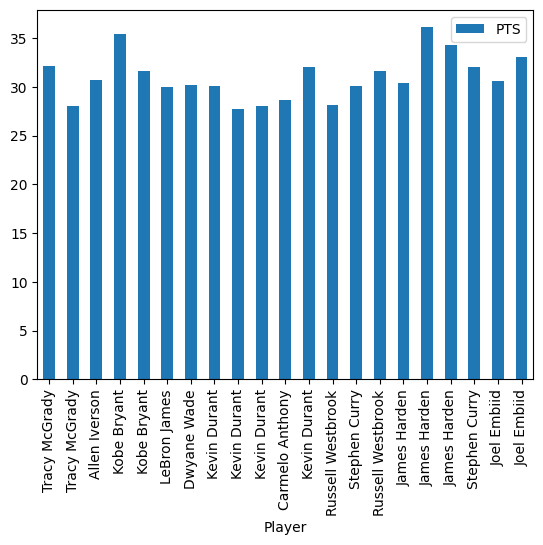

In [61]:
highest_scoring_by_year_all_nba = stats_nba.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
highest_scoring_by_year_all_nba.plot.bar("Player", "PTS")

<Axes: xlabel='Player'>

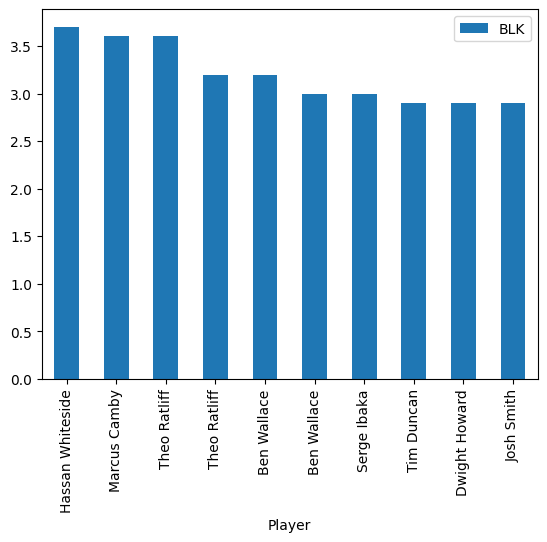

In [26]:
highest_blocks_all_defense = stats_defense[stats_defense["G"] > 70].sort_values("BLK", ascending=False).head(10)
highest_blocks_all_defense.plot.bar("Player", "BLK")

/var/folders/7y/x2g2fgds6c9d9xrjrvscg14r0000gn/T/ipykernel_27934/1810872157.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_steal_by_year_all_defense = stats_defense.groupby("Year").apply(lambda x: x.sort_values("STL", ascending=False).head(1))


<Axes: xlabel='Year'>

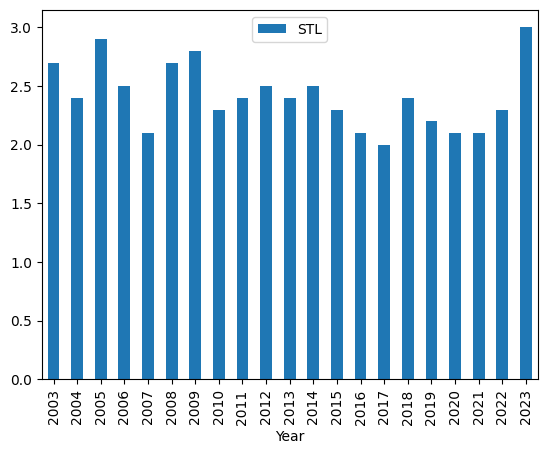

In [62]:
highest_steal_by_year_all_defense = stats_defense.groupby("Year").apply(lambda x: x.sort_values("STL", ascending=False).head(1))
highest_steal_by_year_all_defense.plot.bar("Year", "STL")

In [63]:
stats_nba.select_dtypes(include=[float]).corr()["Share"]

MP         0.269000
FG         0.416376
FGA        0.382206
FG%        0.093613
3P         0.161640
3PA        0.164783
3P%        0.028332
2P         0.418772
2PA        0.390922
2P%        0.080671
eFG%       0.078420
FT         0.495322
FTA        0.498811
FT%        0.070417
ORB        0.151600
DRB        0.337724
TRB        0.296402
AST        0.335358
STL        0.267041
BLK        0.213187
TOV        0.380824
PF         0.134129
PTS        0.436609
Pts Won    0.994791
Pts Max    0.559551
Share      1.000000
W/L%       0.164306
PS/G       0.050081
PA/G      -0.047048
SRS        0.160269
Name: Share, dtype: float64

In [64]:
stats_defense.select_dtypes(include=[float]).corr()["Share"]  # gets the values that are of float type and compares them
#stats_defense.dtypes

Age        0.038722
G          0.144645
GS         0.274107
MP         0.236897
FG         0.235615
FGA        0.208087
FG%        0.089429
3P         0.059488
3PA        0.062498
3P%       -0.004097
2P         0.249346
2PA        0.227328
2P%        0.072817
eFG%       0.074206
FT         0.252356
FTA        0.276793
FT%        0.009329
ORB        0.182827
DRB        0.288774
TRB        0.271053
AST        0.206148
STL        0.292872
BLK        0.292893
TOV        0.218017
PF         0.151905
PTS        0.236630
Pts Won    0.868662
Pts Max    0.450153
Share      1.000000
W          0.164396
L         -0.163446
W/L%       0.166805
PS/G       0.020351
PA/G      -0.081545
SRS        0.166485
Name: Share, dtype: float64

<Axes: >

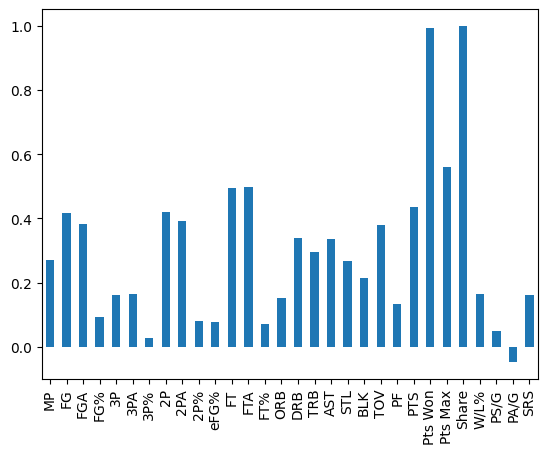

In [65]:
stats_nba.select_dtypes(include=[float]).corr()["Share"].plot.bar()

<Axes: >

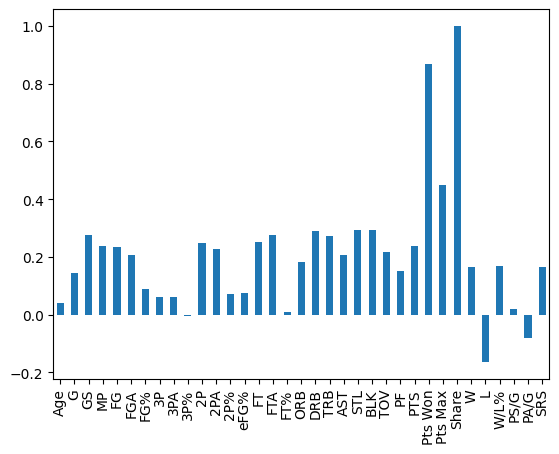

In [66]:
stats_defense.select_dtypes(include=[float]).corr()["Share"].plot.bar()